In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import copy
import networkx as nx
import pandas as pd
from matplotlib.patches import Patch
import time

In [2]:
from multisoc.generate.multidimensional_network import multidimensional_network_fix_av_degree
from multisoc.generate.two_dimensional_population import consol_comp_pop_frac_tnsr
from multisoc.generate.two_dimensional_population import relative_correlation_inv
from multisoc.generate.utils import make_composite_index
from multisoc.theory.multidimensional_preferences import composite_H
from multisoc.metrics.fairness_metrics import *
from multisoc.theory.fairness_metrics import *

In [3]:
from helpers_for_viz import *

## Preamble for figures

In [4]:
color_dict = {
	    (0,0):"#8A2846",
	    (0,1):"#03045E",
	    (1,0):"#FFC2D4",
	    (1,1):"#CAF0F8"
	    }
groups_lst = [(0,0),(0,1),(1,0),(1,1)]
group_labels = [["f","m"],["C","D"]]
colors_race = ["#595959","#d9d9d9"]
colors_gender = ["#c63963","#3A6CC6"]

## Intial multidimensional example

In [5]:
## Common parameters
## Number of nodes and links
N = 100 ## Number of nodes
m = 10  ## Average number of connections per node
g_vec = [2,2]
iterations = 100

kind = "all" ## Aggregation function: {all->and, one->mean, any->or}
p_d = [0.5, 0.5] ## Weight of each dimension for "mean" aggregation function

## Preferences
h_cat = 0.9
h_dog = 0.9

h_f = 0.9
h_m = 0.9

## List of 1d homophily matrices (2 for a two-dimensional system)
h_mtrx_lst = [
    
    np.array([[h_f,1-h_f],
              [1-h_m,h_m]]),
    
    np.array([[h_cat,1-h_cat],
              [1-h_dog,h_dog]])
]

## Population distribution
f_f = 0.32
f_cat = 0.46

assert f_f < f_cat

pop_fracs_lst = [
    [f_f,1-f_f],
    [f_cat,1-f_cat]
]

correlation = 0.7 ## Try: -0.7, 0, 0.7
consol = relative_correlation_inv(max(f_f,f_cat),correlation)
comp_pop_frac_tnsr = consol_comp_pop_frac_tnsr(pop_fracs_lst,consol)

print (consol)
print (np.round(N*comp_pop_frac_tnsr))

0.8380000000000001
[[27.  5.]
 [19. 49.]]


In [6]:
## Name
fname = f"initial_multi_example_HighCorrelation_ff{int(100*f_f):02d}_fC{int(100*f_cat):02d}_c{int(100*consol):02d}_hf{int(100*h_f):02d}_hm{int(100*h_m):02d}_hC{int(100*h_cat):02d}_hD{int(100*h_dog):02d}"

In [5]:
generate_viz_package(
    N,
    m,
    h_mtrx_lst,
    pop_fracs_lst,
    comp_pop_frac_tnsr,
    g_vec,
    group_labels,
    iterations=iterations,
    folder="./viz_data",
    fname=fname,
    draw_network =True,
    seed = 12 ## 18
    )

NameError: name 'generate_viz_package' is not defined

### Corresponding 1D example

C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\helpers_for_viz.py:249: UserWarning: Correlation is only uniquely defined for 2x2 populations. Returning NaN.
  warnings.warn("Correlation is only uniquely defined for 2x2 populations. Returning NaN.")


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\helpers_for_viz.py:307: UserWarning: File ./viz_data/initial_1D_example_HighCorrelation_ff32_fC46_c83_hf90_hm90_hC90_hD90 exists. Overwriting.
  warnings.warn(f"File {save_path} exists. Overwriting.")
C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\helpers_for_viz.py:322: UserWarning: File ./viz_data/initial_1D_example_HighCorrelation_ff32_fC46_c83_hf90_hm90_hC90_hD90/example_network.json exists. Overwriting.
  warnings.warn(f"File {save_path} exists. Overwriting.")
C:\Users\csh_samu\anaconda3\envs\multisoc_edit\Lib\site-packages\networkx\readwrite\json_graph\node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_lin

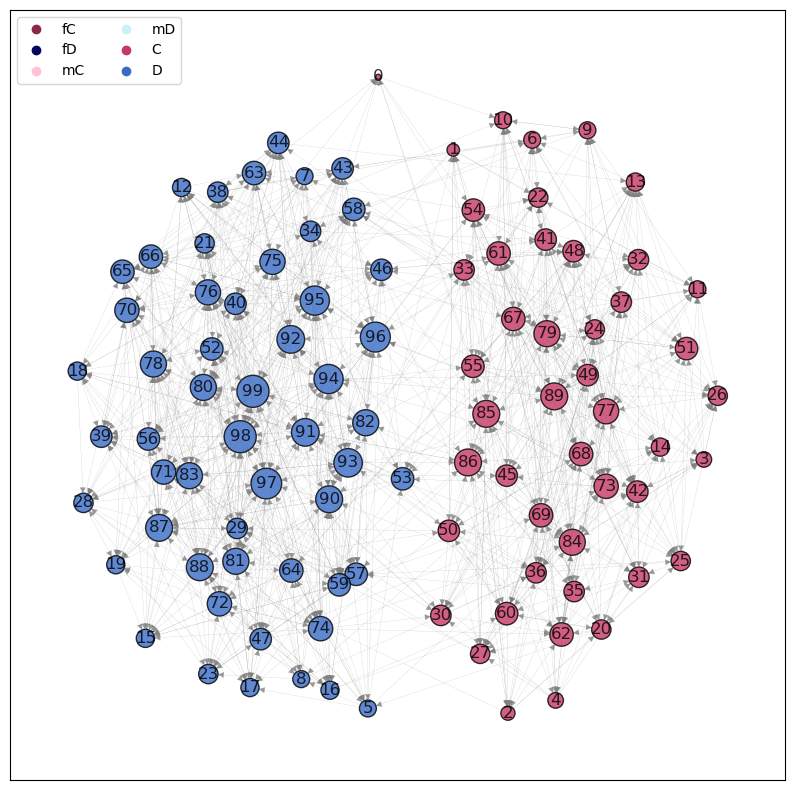

In [9]:
## Name
# f_f = consol = h_f = h_m = -10
g_vec = [2]

fname = f"initial_1D_example_HighCorrelation_ff{int(100*f_f):02d}_fC{int(100*f_cat):02d}_c{int(100*consol):02d}_hf{int(100*h_f):02d}_hm{int(100*h_m):02d}_hC{int(100*h_cat):02d}_hD{int(100*h_dog):02d}"
generate_viz_package(
    N,
    m,
    [h_mtrx_lst[1]],
    [pop_fracs_lst[1]],
    np.array(pop_fracs_lst[1]),
    g_vec,
    [group_labels[1]],
    iterations=iterations,
    folder="./viz_data",
    fname=fname,
    draw_network =True,
    seed = 10 ## 6, 10 OLD - 12, 18
    )

## Full bank of networks exploring all parameters
https://stackoverflow.com/questions/34270582/adding-file-to-existing-zipfile

In [6]:
h_CD_values = np.linspace(0.1,0.9,9)
h_fm_values = np.linspace(0.1,0.9,9)
corr_values = np.linspace(-0.8,0.8,9)
f_f_values = np.linspace(0.1,0.5,9)
f_C_values = np.linspace(0.1,0.5,9)

In [10]:
## Common parameters
## Number of nodes and links
N = 200 ## Number of nodes 200
m = 10  ## Average number of connections per node 10
g_vec = [2,2]
iterations = 50 ## 50

kind = "all" ## Aggregation function: {all->and, one->mean, any->or}
p_d = [0.5, 0.5] ## Weight of each dimension for "mean" aggregation function

In [15]:
for h_CD in h_CD_values:
    for h_fm in h_fm_values:
        for correlation in corr_values:
            for f_f in f_f_values:
                for f_cat in f_C_values:
                    
                    if f_f > f_cat:
                        continue

                    ## Preferences
                    h_cat = h_CD
                    h_dog = h_CD
                    
                    h_f = h_fm
                    h_m = h_fm
                    
                    ## List of 1d homophily matrices (2 for a two-dimensional system)
                    h_mtrx_lst = [
                        
                        np.array([[h_f,1-h_f],
                                  [1-h_m,h_m]]),
                        
                        np.array([[h_cat,1-h_cat],
                                  [1-h_dog,h_dog]])
                    ]
                    
                    assert f_f <= f_cat
                    
                    pop_fracs_lst = [
                        [f_f,1-f_f],
                        [f_cat,1-f_cat]
                    ]
                    
                    consol = relative_correlation_inv(max(f_f,f_cat),correlation)
                    comp_pop_frac_tnsr = consol_comp_pop_frac_tnsr(pop_fracs_lst,consol)
                    
                    fname = f"initial_multi_example_HighCorrelation_ff{int(100*f_f):02d}_fC{int(100*f_cat):02d}_c{int(100*consol):02d}_hf{int(100*h_f):02d}_hm{int(100*h_m):02d}_hC{int(100*h_cat):02d}_hD{int(100*h_dog):02d}"
                    
                    generate_viz_package(
                        N,
                        m,
                        h_mtrx_lst,
                        pop_fracs_lst,
                        comp_pop_frac_tnsr,
                        g_vec,
                        group_labels,
                        iterations=iterations,
                        folder="./viz_data/all_parameters",
                        fname=fname,
                        draw_network =False,
                        seed = 12 ## 18
                        )

  0%|          | 0/5 [00:00<?, ?it/s]

WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\helpers_for_viz.py:188: RuntimeWarning: Mean of empty slice
  group_degrees_av_std["mean"].append(np.nanmean(vals))
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


  0%|          | 0/5 [00:00<?, ?it/s]

WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\helpers_for_viz.py:188: RuntimeWarning: Mean of empty slice
  group_degrees_av_std["mean"].append(np.nanmean(vals))
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


  0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Parallel version

In [9]:
from multiprocessing import Pool

In [8]:
def worker_function(h_CD,h_fm,correlation,f_f,f_cat):
    if f_f > f_cat:
        return

    ## Preferences
    h_cat = h_CD
    h_dog = h_CD
    
    h_f = h_fm
    h_m = h_fm
    
    ## List of 1d homophily matrices (2 for a two-dimensional system)
    h_mtrx_lst = [
        
        np.array([[h_f,1-h_f],
                  [1-h_m,h_m]]),
        
        np.array([[h_cat,1-h_cat],
                  [1-h_dog,h_dog]])
    ]
    
    assert f_f <= f_cat
    
    pop_fracs_lst = [
        [f_f,1-f_f],
        [f_cat,1-f_cat]
    ]
    
    consol = relative_correlation_inv(max(f_f,f_cat),correlation)
    comp_pop_frac_tnsr = consol_comp_pop_frac_tnsr(pop_fracs_lst,consol)
    
    fname = f"initial_multi_example_HighCorrelation_ff{int(100*f_f):02d}_fC{int(100*f_cat):02d}_c{int(100*consol):02d}_hf{int(100*h_f):02d}_hm{int(100*h_m):02d}_hC{int(100*h_cat):02d}_hD{int(100*h_dog):02d}"
    
    generate_viz_package(
        N,
        m,
        h_mtrx_lst,
        pop_fracs_lst,
        comp_pop_frac_tnsr,
        g_vec,
        group_labels,
        iterations=iterations,
        folder="./viz_data/all_parameters",
        fname=fname,
        draw_network =False,
        seed = 12 ## 18
        )

In [9]:
for h_CD in h_CD_values:
    for h_fm in h_fm_values:
        for correlation in corr_values:
            for f_f in f_f_values:
                # with Pool(processes=4,maxtasksperchild=16) as pool: 
                for f_cat in f_C_values:
                    worker_function(h_CD,h_fm,correlation,f_f,f_cat)
                    #     result = pool.apply_async(worker_function,args=(h_CD,h_fm,correlation,f_f,f_cat))
                    #     result.get()
                    # pool.close()
                    # pool.join()
                # pool.map(worker_function,f_C_values)             

  0%|          | 0/5 [00:00<?, ?it/s]

WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\helpers_for_viz.py:188: RuntimeWarning: Mean of empty slice
  group_degrees_av_std["mean"].append(np.nanmean(vals))
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


  0%|          | 0/5 [00:00<?, ?it/s]

WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\helpers_for_viz.py:188: RuntimeWarning: Mean of empty slice
  group_degrees_av_std["mean"].append(np.nanmean(vals))
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


  0%|          | 0/5 [00:00<?, ?it/s]

WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\helpers_for_viz.py:188: RuntimeWarning: Mean of empty slice
  group_degrees_av_std["mean"].append(np.nanmean(vals))
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


  0%|          | 0/5 [00:00<?, ?it/s]

WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\helpers_for_viz.py:188: RuntimeWarning: Mean of empty slice
  group_degrees_av_std["mean"].append(np.nanmean(vals))
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\helpers_for_viz.py:188: RuntimeWarning: Mean of empty slice
  group_degrees_av_std["mean"].append(np.nanmean(vals))
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.
WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\helpers_for_viz.py:188: RuntimeWarning: Mean of empty slice
  group_degrees_av_std["mean"].append(np.nanmean(vals))
C:\Users\csh_samu\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


WARNING! At least one multidimensional group has no members.            Increase total population size N or change population fractions.


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Rename files so that they have correlation instead of consolidation

In [9]:
import os

In [10]:
base_path = "./viz_data/SERVER_COMPUTATIONS/all_parameters/viz_data/all_parameters"

In [11]:
folder_list = os.listdir(base_path)
for subfolder in folder_list:
    with open(base_path  + "/" + subfolder + "/parameters.json", "r") as f:
        param_dct = json.loads(f.read())
        print (param_dct)
        break

FileNotFoundError: [Errno 2] No such file or directory: './viz_data/SERVER_COMPUTATIONS/all_parameters/viz_data/all_parameters/initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10/parameters.json'

In [13]:
os.path.isfile('./viz_data/SERVER_COMPUTATIONS/all_parameters/viz_data/all_parameters/initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10/example_network.json')

False

In [14]:
os.listdir('./viz_data/SERVER_COMPUTATIONS/all_parameters/viz_data/all_parameters/initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10')

FileNotFoundError: [WinError 3] The system cannot find the path specified: './viz_data/SERVER_COMPUTATIONS/all_parameters/viz_data/all_parameters/initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10'

In [15]:
folder_list = os.listdir(base_path)

In [16]:
folder_list[0]

'initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10'

In [17]:
os.listdir(base_path + "/" + folder_list[0])

FileNotFoundError: [WinError 3] The system cannot find the path specified: './viz_data/SERVER_COMPUTATIONS/all_parameters/viz_data/all_parameters/initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10'

In [18]:
base_path + "/" + folder_list[0]

'./viz_data/SERVER_COMPUTATIONS/all_parameters/viz_data/all_parameters/initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10'

In [19]:
r'./viz_data/SERVER_COMPUTATIONS/all_parameters/viz_data/all_parameters/initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10'

'./viz_data/SERVER_COMPUTATIONS/all_parameters/viz_data/all_parameters/initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10'

In [28]:
os.listdir(".\viz_data\SERVER_COMPUTATIONS\all_parameters\viz_data\all_parameters\initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10")

OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: '.\x0biz_data\\SERVER_COMPUTATIONS\x07ll_parameters\x0biz_data\x07ll_parameters\\initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10'

In [22]:
os.listdir(os.path.join(base_path, folder_list[0]))

FileNotFoundError: [WinError 3] The system cannot find the path specified: './viz_data/SERVER_COMPUTATIONS/all_parameters/viz_data/all_parameters\\initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10'

In [29]:
os.listdir("./viz_data/initial_multi_example_HighCorrelation_ff32_fC46_c83_hf90_hm90_hC90_hD90")

['average_degrees_1D.csv',
 'average_degrees_multi.csv',
 'degree_ranking_1D.csv',
 'degree_ranking_multi.csv',
 'example_network.json',
 'network.png',
 'parameters.json']

In [33]:
os.listdir("./viz_data/SERVER_COMPUTATIONS/all_parameters/viz_data/all_parameters/initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10")

FileNotFoundError: [WinError 3] The system cannot find the path specified: './viz_data/SERVER_COMPUTATIONS/all_parameters/viz_data/all_parameters/initial_multi_example_HighCorrelation_ff10_fC10_c01_hf10_hm10_hC10_hD10'